In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]

In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/plant/Dataset'

In [0]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)





58892288/58889256 [==============================] - 2s 0us/step








In [0]:
for layer in vgg.layers:
  layer.trainable = False

In [0]:
folders = glob('/content/drive/My Drive/Colab Notebooks/plant/Dataset/*')
print(len(folders))

4


In [0]:
x = Flatten()(vgg.output)

In [0]:
x = Dense(1000, activation='relu')(x)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

r=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 5,
    use_multiprocessing = False)

Found 2545 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Epoch 1/5
79/79 [==============================] - 37s 466ms/step - loss: 0.0557 - acc: 0.9814 - val_loss: 0.0708 - val_acc: 0.9737
Epoch 2/5
79/79 [==============================] - 38s 476ms/step - loss: 0.0370 - acc: 0.9869 - val_loss: 0.0501 - val_acc: 0.9818
Epoch 3/5
79/79 [==============================] - 38s 476ms/step - loss: 0.0280 - acc: 0.9905 - val_loss: 0.0537 - val_acc: 0.9801
Epoch 4/5
79/79 [==============================] - 37s 471ms/step - loss: 0.0461 - acc: 0.9814 - val_loss: 0.0981 - val_acc: 0.9685
Epoch 5/5
79/79 [==============================] - 37s 472ms/step - loss: 0.0265 - acc: 0.9889 - val_loss: 0.0718 - val_acc: 0.9784


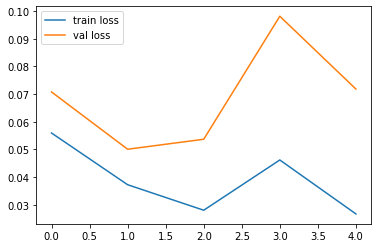

<Figure size 432x288 with 0 Axes>

In [24]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

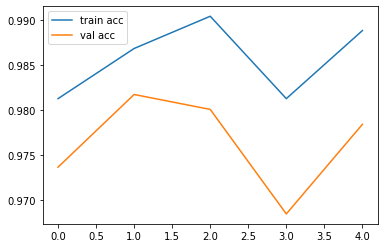

<Figure size 432x288 with 0 Axes>

In [25]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/plant/apple.h5')